Importing required Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("C:/Users/Me/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Preprocessing

Drop customerID

In [4]:
df.drop('customerID',axis='columns',inplace=True)

Checking datatypes of columns

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

Checking null values in TotalCharges

In [8]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Dropping rows where TotalCharges are null

In [9]:
df=df[df.TotalCharges!=' ']

In [10]:
df[pd.to_numeric(df.TotalCharges).isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [11]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)

In [13]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Visualising Customer Churn based on Tenure

In [14]:
tenure_churn_no=df[df.Churn=='No'].tenure
tenure_churn_yes=df[df.Churn=='Yes'].tenure

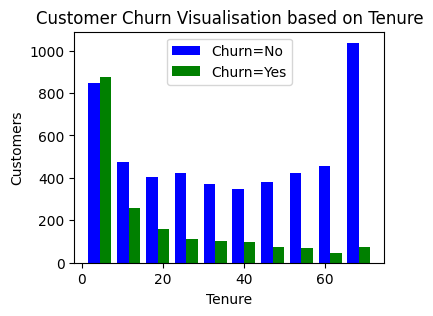

In [15]:
plt.figure(figsize=(4,3))
plt.xlabel('Tenure')
plt.ylabel('Customers')
plt.title('Customer Churn Visualisation based on Tenure')
plt.hist([tenure_churn_no,tenure_churn_yes],color=['blue','green'],label=['Churn=No','Churn=Yes'])
plt.legend()

Visualising Customer Churn based on MoonthlyCharges

In [16]:
mc_churn_no=df[df.Churn=='No'].MonthlyCharges
mc_churn_yes=df[df.Churn=='Yes'].MonthlyCharges

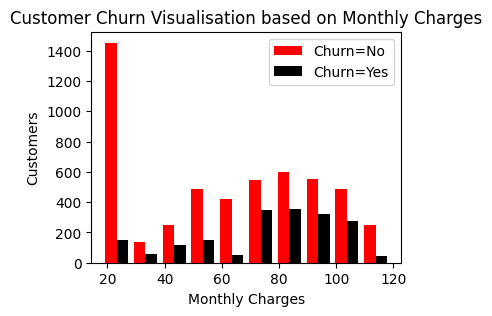

In [17]:
plt.figure(figsize=(4,3))
plt.xlabel('Monthly Charges')
plt.ylabel('Customers')
plt.title('Customer Churn Visualisation based on Monthly Charges')
plt.hist([mc_churn_no,mc_churn_yes],color=['red','black'],label=['Churn=No','Churn=Yes'])
plt.legend()

Checking unique values for all columns

In [18]:
for column in df:
    print(f'{column}:{df[column].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   

Checking unique values for object columns

In [19]:
def check_unique(dfx):
    for column in dfx:
        if dfx[column].dtypes=='object':
            print(f'{column}:{dfx[column].unique()}')

In [20]:
check_unique(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


Replacing 'No internet service' and 'No phone service' to 'No'

In [21]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [22]:
check_unique(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


To replce 'Yes' and 'No' with 1 and 0

In [23]:
yes_no_columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService',
'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
'Contract','PaperlessBilling','PaymentMethod','Churn']

In [24]:
for col in yes_no_columns:
    df[col].replace({'Yes':1,'No':0},inplace=True)

In [25]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 0]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [26]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [27]:
df['gender'].unique()

array([1, 0], dtype=int64)

Using Hot Encoding where unique values more than two

In [28]:
df=pd.get_dummies(data=df,columns=['PaymentMethod','InternetService','Contract'])

In [29]:
df.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year
3534,1,0,0,1,46,1,0,1,1,0,...,1,0,0,0,0,0,1,0,1,0
3661,1,0,0,0,51,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4782,0,0,0,0,5,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0


In [30]:
col_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[col_to_scale]=scaler.fit_transform(df[col_to_scale])

In [31]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

Splitting of data in x and y

In [32]:
x=df.drop('Churn',axis='columns')
y=df['Churn']

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)

In [34]:
len(x_train.columns)

26

Function responsible for Deep Learning

In [35]:
def ann(x_train,y_train,x_test,y_test,loss,weights):
    model=keras.Sequential([
        keras.layers.Dense(26,input_shape=(26,),activation='relu'),
        keras.layers.Dense(18,activation='sigmoid'),
        keras.layers.Dense(6,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])

    model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])
    
    if weights==-1:
        model.fit(x_train,y_train,epochs=100)
    else:
        model.fit(x_train,y_train,epochs=100,class_weights=weights)
    
    model.evaluate(x_test,y_test)

    y_predict=model.predict(x_test)
    y_predict=np.round(y_predict)
    print('Classification Report:\n',classification_report(y_test,y_predict))
    return y_predict    

In [36]:
y_predict_sampled=ann(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
154/154 [==============================] - 2s 5ms/step - loss: 0.5984 - accuracy: 0.6847
Epoch 2/100
154/154 [==============================] - 1s 5ms/step - loss: 0.4612 - accuracy: 0.7743
Epoch 3/100
154/154 [==============================] - 1s 4ms/step - loss: 0.4277 - accuracy: 0.7960
Epoch 4/100
154/154 [==============================] - 1s 4ms/step - loss: 0.4207 - accuracy: 0.8021
Epoch 5/100
154/154 [==============================] - 1s 4ms/step - loss: 0.4163 - accuracy: 0.8056
Epoch 6/100
154/154 [==============================] - 1s 4ms/step - loss: 0.4142 - accuracy: 0.8078
Epoch 7/100
154/154 [==============================] - 1s 4ms/step - loss: 0.4130 - accuracy: 0.8054
Epoch 8/100
154/154 [==============================] - 1s 4ms/step - loss: 0.4122 - accuracy: 0.8037
Epoch 9/100
154/154 [==============================] - 1s 4ms/step - loss: 0.4107 - accuracy: 0.8104
Epoch 10/100
154/154 [==============================] - 1s 4ms/step - loss: 0.4092 - accura

Methods of Handling Imbalance in Datasets

Method_1:Undersampling

In [37]:
count_class_0,count_class_1=df.Churn.value_counts()
df_class_0=df[df['Churn']==0]
df_class_1=df[df['Churn']==1]

In [38]:
print(df_class_0.shape)
print(df_class_1.shape)

(5163, 27)
(1869, 27)


In [39]:
df_class_0_under_sampled=df_class_0.sample(count_class_1)
df_class_0_under_sampled.shape

(1869, 27)

In [40]:
df_test_undersampled=pd.concat([df_class_0_under_sampled, df_class_1],axis=0)
df_test_undersampled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year
3436,0,0,0,0,0.338028,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
6501,1,0,1,0,0.929577,1,1,0,1,1,...,1,0,0,0,0,0,1,0,1,0
2541,1,0,1,1,1.000000,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
2702,0,0,0,0,0.000000,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
737,0,0,1,0,0.971831,1,0,1,1,1,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,0,0,0,0,0.154930,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
7026,1,0,0,0,0.112676,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
7032,0,1,0,0,0.000000,1,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
7034,1,0,0,0,0.929577,1,1,1,1,1,...,0,1,0,0,0,0,1,1,0,0


In [41]:
x_sampled=df_class_0_under_sampled.drop('Churn',axis='columns')
y_sampled=df_class_1['Churn']
x_train_sampled,x_test_sampled,y_train_sampled,y_test_sampled=train_test_split(x_sampled,y_sampled,test_size=0.23,stratify=y_sampled)

In [42]:
y_predict_sampled=ann(x_train_sampled,y_train_sampled,x_test_sampled,y_test_sampled,'binary_crossentropy',-1)

Epoch 1/100
45/45 [==============================] - 2s 4ms/step - loss: 0.5944 - accuracy: 1.0000
Epoch 2/100
45/45 [==============================] - 0s 3ms/step - loss: 0.3753 - accuracy: 1.0000
Epoch 3/100
45/45 [==============================] - 0s 5ms/step - loss: 0.2003 - accuracy: 1.0000
Epoch 4/100
45/45 [==============================] - 0s 4ms/step - loss: 0.0988 - accuracy: 1.0000
Epoch 5/100
45/45 [==============================] - 0s 4ms/step - loss: 0.0460 - accuracy: 1.0000
Epoch 6/100
45/45 [==============================] - 0s 4ms/step - loss: 0.0240 - accuracy: 1.0000
Epoch 7/100
45/45 [==============================] - 0s 5ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 8/100
45/45 [==============================] - 0s 5ms/step - loss: 0.0105 - accuracy: 1.0000
Epoch 9/100
45/45 [==============================] - 0s 4ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 10/100
45/45 [==============================] - 0s 5ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 11/

Method_2:Oversampling

In [43]:
count_class_0,count_class_1

(5163, 1869)

In [44]:
df_class_1_over_sampled=df_class_1.sample(count_class_0,replace=True)
df_class_1_over_sampled.shape

(5163, 27)

In [45]:
df_test_oversampled=pd.concat([df_class_0, df_class_1_over_sampled],axis=0)
df_test_oversampled.shape

(10326, 27)

In [46]:
x_sampled=df_test_oversampled.drop('Churn',axis='columns')
y_sampled=df_test_oversampled['Churn']
x_train_sampled,x_test_sampled,y_train_sampled,y_test_sampled=train_test_split(x_sampled,y_sampled,test_size=0.23,stratify=y_sampled)

In [47]:
y_predict_sampled=ann(x_train_sampled,y_train_sampled,x_test_sampled,y_test_sampled,'binary_crossentropy',-1)

Epoch 1/100
249/249 [==============================] - 2s 4ms/step - loss: 0.5803 - accuracy: 0.7263
Epoch 2/100
249/249 [==============================] - 1s 4ms/step - loss: 0.5002 - accuracy: 0.7575
Epoch 3/100
249/249 [==============================] - 1s 4ms/step - loss: 0.4923 - accuracy: 0.7627
Epoch 4/100
249/249 [==============================] - 1s 4ms/step - loss: 0.4878 - accuracy: 0.7634
Epoch 5/100
249/249 [==============================] - 1s 5ms/step - loss: 0.4843 - accuracy: 0.7658
Epoch 6/100
249/249 [==============================] - 1s 5ms/step - loss: 0.4813 - accuracy: 0.7661
Epoch 7/100
249/249 [==============================] - 1s 3ms/step - loss: 0.4783 - accuracy: 0.7686
Epoch 8/100
249/249 [==============================] - 1s 4ms/step - loss: 0.4749 - accuracy: 0.7729
Epoch 9/100
249/249 [==============================] - 1s 3ms/step - loss: 0.4730 - accuracy: 0.7677
Epoch 10/100
249/249 [==============================] - 1s 3ms/step - loss: 0.4706 - accura

Method_3:SMOTE

Installing and Importing imbalanced-learn

In [48]:
x=df.drop('Churn',axis='columns')
y=df['Churn']

In [49]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [50]:
#pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [51]:
smote=SMOTE(sampling_strategy='minority')
x_sm,y_sm=smote.fit_resample(x,y)

In [52]:
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [53]:
x_train_sampled,x_test_sampled,y_train_sampled,y_test_sampled=train_test_split(x_sm,y_sm,test_size=0.23,random_state=0,stratify=y_sm)

In [54]:
y_train_sampled.value_counts()

1    3976
0    3975
Name: Churn, dtype: int64

In [55]:
y_test_sampled.value_counts()

0    1188
1    1187
Name: Churn, dtype: int64

In [56]:
y_predict_sampled=ann(x_train_sampled,y_train_sampled,x_test_sampled,y_test_sampled,'binary_crossentropy',-1)

Epoch 1/100
249/249 [==============================] - 2s 4ms/step - loss: 0.5806 - accuracy: 0.7276
Epoch 2/100
249/249 [==============================] - 1s 4ms/step - loss: 0.4898 - accuracy: 0.7681
Epoch 3/100
249/249 [==============================] - 1s 4ms/step - loss: 0.4790 - accuracy: 0.7746
Epoch 4/100
249/249 [==============================] - 1s 3ms/step - loss: 0.4734 - accuracy: 0.7746
Epoch 5/100
249/249 [==============================] - 1s 3ms/step - loss: 0.4691 - accuracy: 0.7765
Epoch 6/100
249/249 [==============================] - 1s 3ms/step - loss: 0.4646 - accuracy: 0.7807
Epoch 7/100
249/249 [==============================] - 1s 4ms/step - loss: 0.4612 - accuracy: 0.7813
Epoch 8/100
249/249 [==============================] - 1s 4ms/step - loss: 0.4592 - accuracy: 0.7828
Epoch 9/100
249/249 [==============================] - 1s 3ms/step - loss: 0.4551 - accuracy: 0.7851
Epoch 10/100
249/249 [==============================] - 1s 3ms/step - loss: 0.4530 - accura

Method_4:Use of Ensemble with Undersampling

In [82]:
x_train_sampled,x_test_sampled,y_train_sampled,y_test_sampled=train_test_split(x,y,test_size=0.20,random_state=0,stratify=y)

In [83]:
y_train_sampled.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [86]:
df_ensembled=x_train_sampled.copy()
df_ensembled['Churn']=y_train_sampled
df_ensembled.shape

(5625, 27)

In [87]:
df_class_0_ensembled=df_ensembled[df_ensembled.Churn==0]
df_class_1_ensembled=df_ensembled[df_ensembled.Churn==1]

In [63]:
4130/1495

2.762541806020067

In [64]:
4130/3

1376.6666666666667

In [90]:
df_class_0_ensembled.shape,df_class_1_ensembled.shape

((4130, 27), (1495, 27))

In [96]:
def train_batch(df_ensembled_majority,df_ensembled_minority,start,end):
    df_ensembled_batch=pd.concat([df_ensembled_majority[start:end],df_ensembled_minority],axis=0)
    x_train_ensembled=df_ensembled_batch.drop('Churn',axis='columns')
    y_train_ensembled=df_ensembled_batch.Churn
    return x_train_ensembled,y_train_ensembled

In [102]:
x_train_ensembled,y_train_ensembled=train_batch(df_class_0_ensembled,df_class_1_ensembled,0,1495)
y_predict_ensembled_batch_1=ann(x_train_ensembled,y_train_ensembled,x_test_sampled,y_test_sampled,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 4ms/step - loss: 0.6488 - accuracy: 0.6622
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5229 - accuracy: 0.7625
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.7659
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.7712
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4798 - accuracy: 0.7779
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.7732
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.7749
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4744 - accuracy: 0.7756
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4699 - accuracy: 0.7786
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4701 - accuracy: 0.7813
Epoch 11/

In [103]:
x_train_ensembled,y_train_ensembled=train_batch(df_class_0_ensembled,df_class_1_ensembled,1495,2990)
y_predict_ensembled_batch_2=ann(x_train_ensembled,y_train_ensembled,x_test_sampled,y_test_sampled,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6751 - accuracy: 0.5338
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6215 - accuracy: 0.7161
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5986 - accuracy: 0.7448
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5869 - accuracy: 0.7495
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5767 - accuracy: 0.7512
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5689 - accuracy: 0.7512
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5625 - accuracy: 0.7522
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.7515
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.7535
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5485 - accuracy: 0.7505
Epoch 11/

In [104]:
x_train_ensembled,y_train_ensembled=train_batch(df_class_0_ensembled,df_class_1_ensembled,2990,4130)
y_predict_ensembled_batch_3=ann(x_train_ensembled,y_train_ensembled,x_test_sampled,y_test_sampled,'binary_crossentropy',-1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6295 - accuracy: 0.6596
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5398 - accuracy: 0.7510
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5108 - accuracy: 0.7598
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.7636
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.7681
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.7677
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.7742
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4835 - accuracy: 0.7712
Epoch 9/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4812 - accuracy: 0.7712
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4796 - accuracy: 0.7715
Epoch 11/

In [108]:
len(y_predict_ensembled_batch_1),len(y_predict_ensembled_batch_2),len(y_predict_ensembled_batch_3)

(1407, 1407, 1407)

In [109]:
y_predict_ensembled_final=y_predict_ensembled_batch_1.copy()
for i in range(len(y_predict_ensembled_batch_1)):
    no_of_ones=y_predict_ensembled_batch_1[i]+y_predict_ensembled_batch_2[i]+y_predict_ensembled_batch_3[i]
    if no_of_ones>1:
        y_predict_ensembled_final[i]=1
    else:
        y_predict_ensembled_final[i]=0

In [111]:
print(classification_report(y_test_sampled,y_predict_ensembled_final))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1033
           1       0.55      0.74      0.63       374

    accuracy                           0.77      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.77      0.78      1407

